# Avocado Project
## Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g.greenskins) are not included in this table.

# Features:

1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold

# Target:

The dataset can be seen in two angles to find the region and find the average price.
(One of Classification and other of Regression)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle

In [2]:
df=pd.read_csv('Avocado.csv')
df=shuffle(df)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
17418,27,2017-06-25,2.09,6199.50,488.90,2780.41,0.00,2930.19,2923.52,6.67,0.0,organic,2017,Tampa
6099,6,2017-11-19,1.01,247158.00,4314.00,89762.00,793.00,152289.00,19201.00,132886.00,203.0,conventional,2017,CincinnatiDayton
17479,35,2017-04-30,1.68,1248175.29,199039.61,421709.78,5187.46,622238.44,400529.93,221708.51,0.0,organic,2017,TotalUS
12363,14,2016-09-18,2.06,21876.53,98.10,19190.24,0.00,2588.19,2588.19,0.00,0.0,organic,2016,Chicago
14333,8,2016-10-30,1.75,44666.00,5090.29,15508.61,572.47,23494.63,5220.39,18274.24,0.0,organic,2016,Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,8,2017-11-05,1.62,71076.94,2483.36,55509.31,33.88,13050.39,9877.42,3172.97,0.0,conventional,2017,Albany
14733,44,2016-02-21,1.48,14413.74,1308.04,4865.24,4.77,8235.69,7090.72,1144.97,0.0,organic,2016,WestTexNewMexico
15427,50,2017-01-15,0.73,50686.37,18780.82,3010.21,270.75,28624.59,15918.63,12705.96,0.0,organic,2017,Denver
15583,47,2017-02-05,1.14,149650.50,4548.46,70014.08,0.00,75087.96,20170.52,54917.44,0.0,organic,2017,GreatLakes


In [3]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 17418 to 11907
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


As per observation:
1. The dataset has 18249 rows and 14 columns.
2. No null value in any column.
3. Date data in object types.
4. 'Unnamed: 0' column is unwanted column, drop it.

In [5]:
df.drop(columns='Unnamed: 0',inplace=True)

# Changing Date column from object type to Date Type

In [6]:
df.Date=pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 17418 to 11907
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


Now dataset has only 13 columns & Date column in datetime type.

# Separate Date column into day and month columns, as dataset has already one year column

In [8]:
df['month'] = df['Date'].dt.month
df['day']=df['Date'].dt.day
df.drop(columns='Date',inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 17418 to 11907
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  month         18249 non-null  int64  
 13  day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 2.1+ MB


In [10]:
numeric_datatypes=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numeric_datatypes.append(i) 
print('Total:', len(numeric_datatypes))
numeric_datatypes

Total: 12


['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year',
 'month',
 'day']

In [11]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


Here AveragePrice,Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags columns have outliet, which will handle later.

# Data Visualization

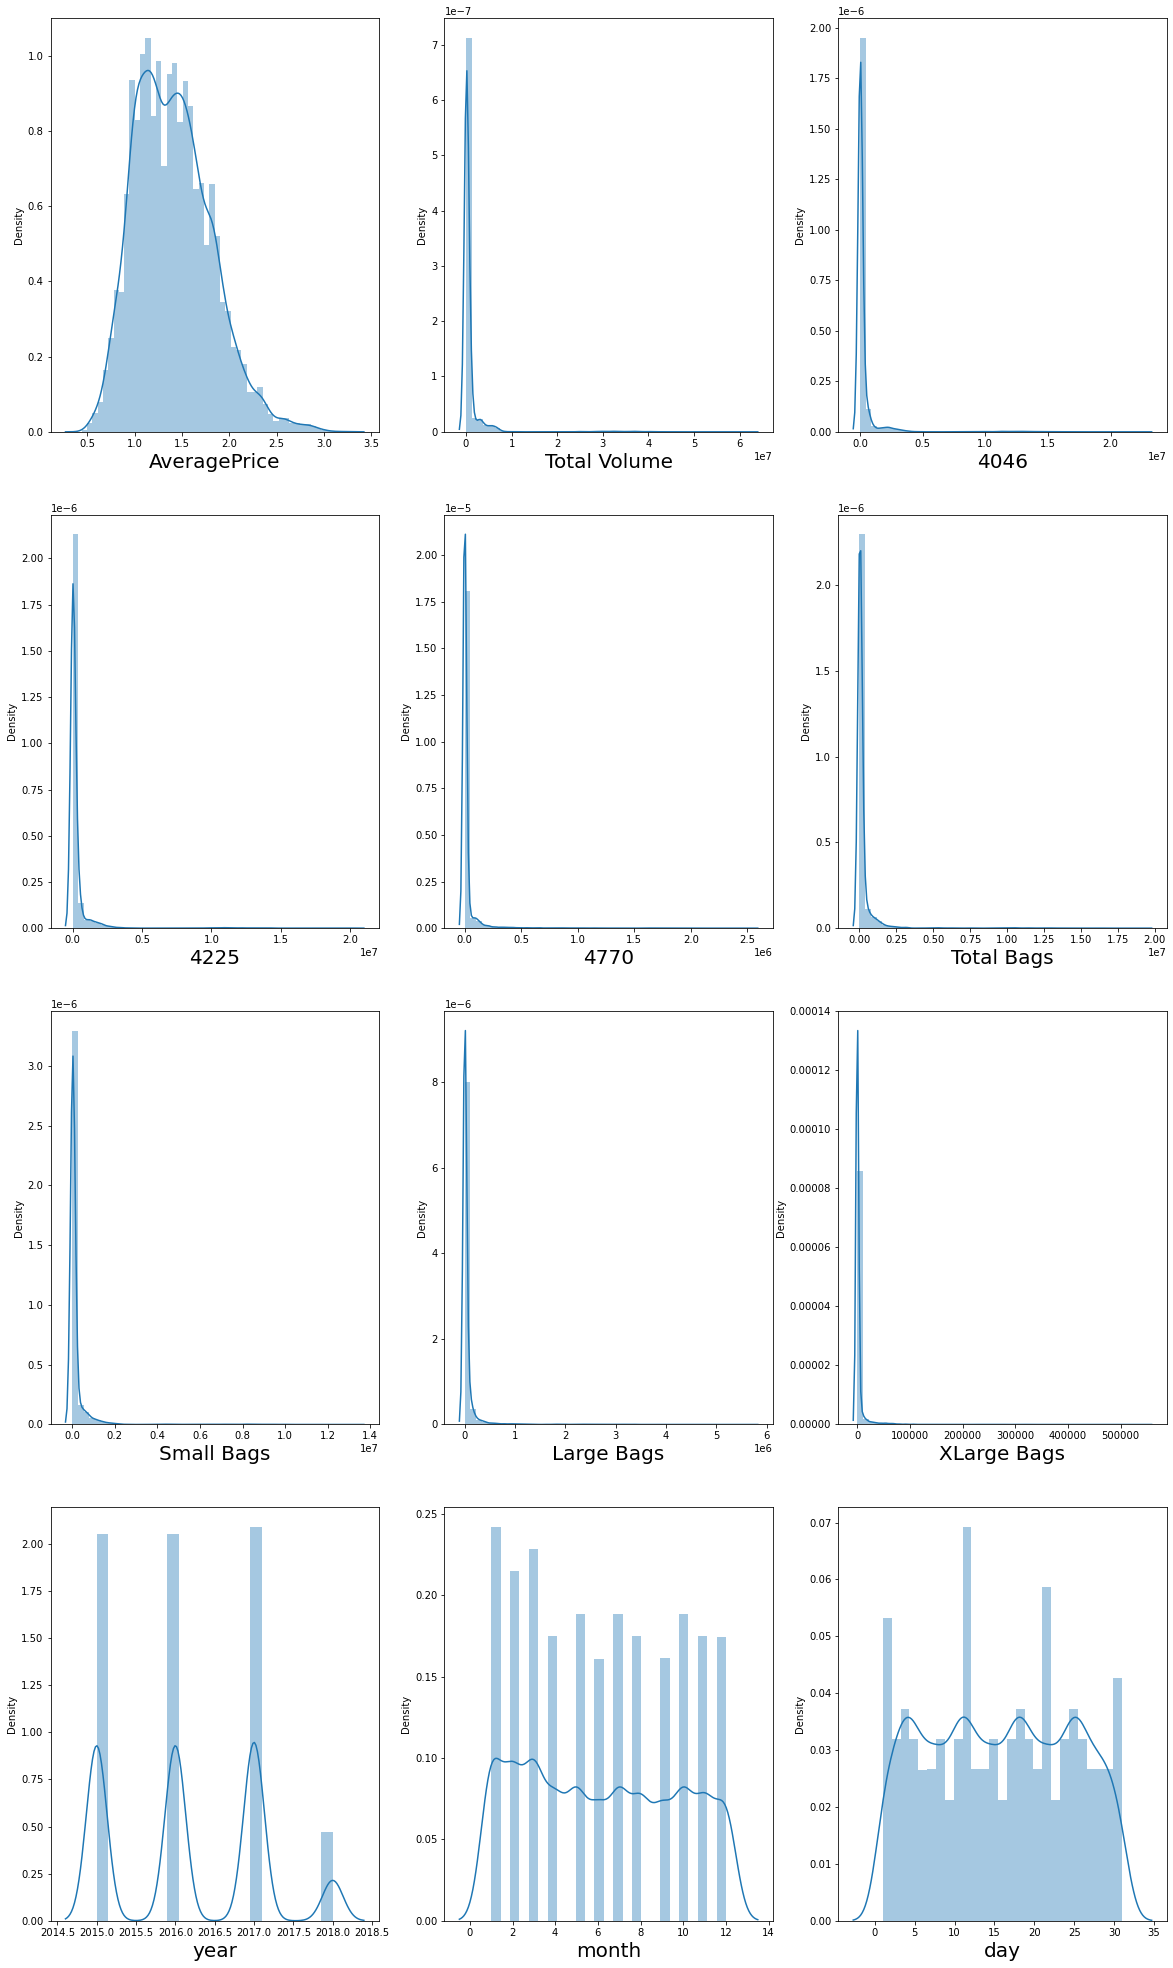

In [12]:
plt.figure (figsize=(20,35))
plotnumber = 1

for column in numeric_datatypes:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)          
    plotnumber+=1
                     
plt.show()

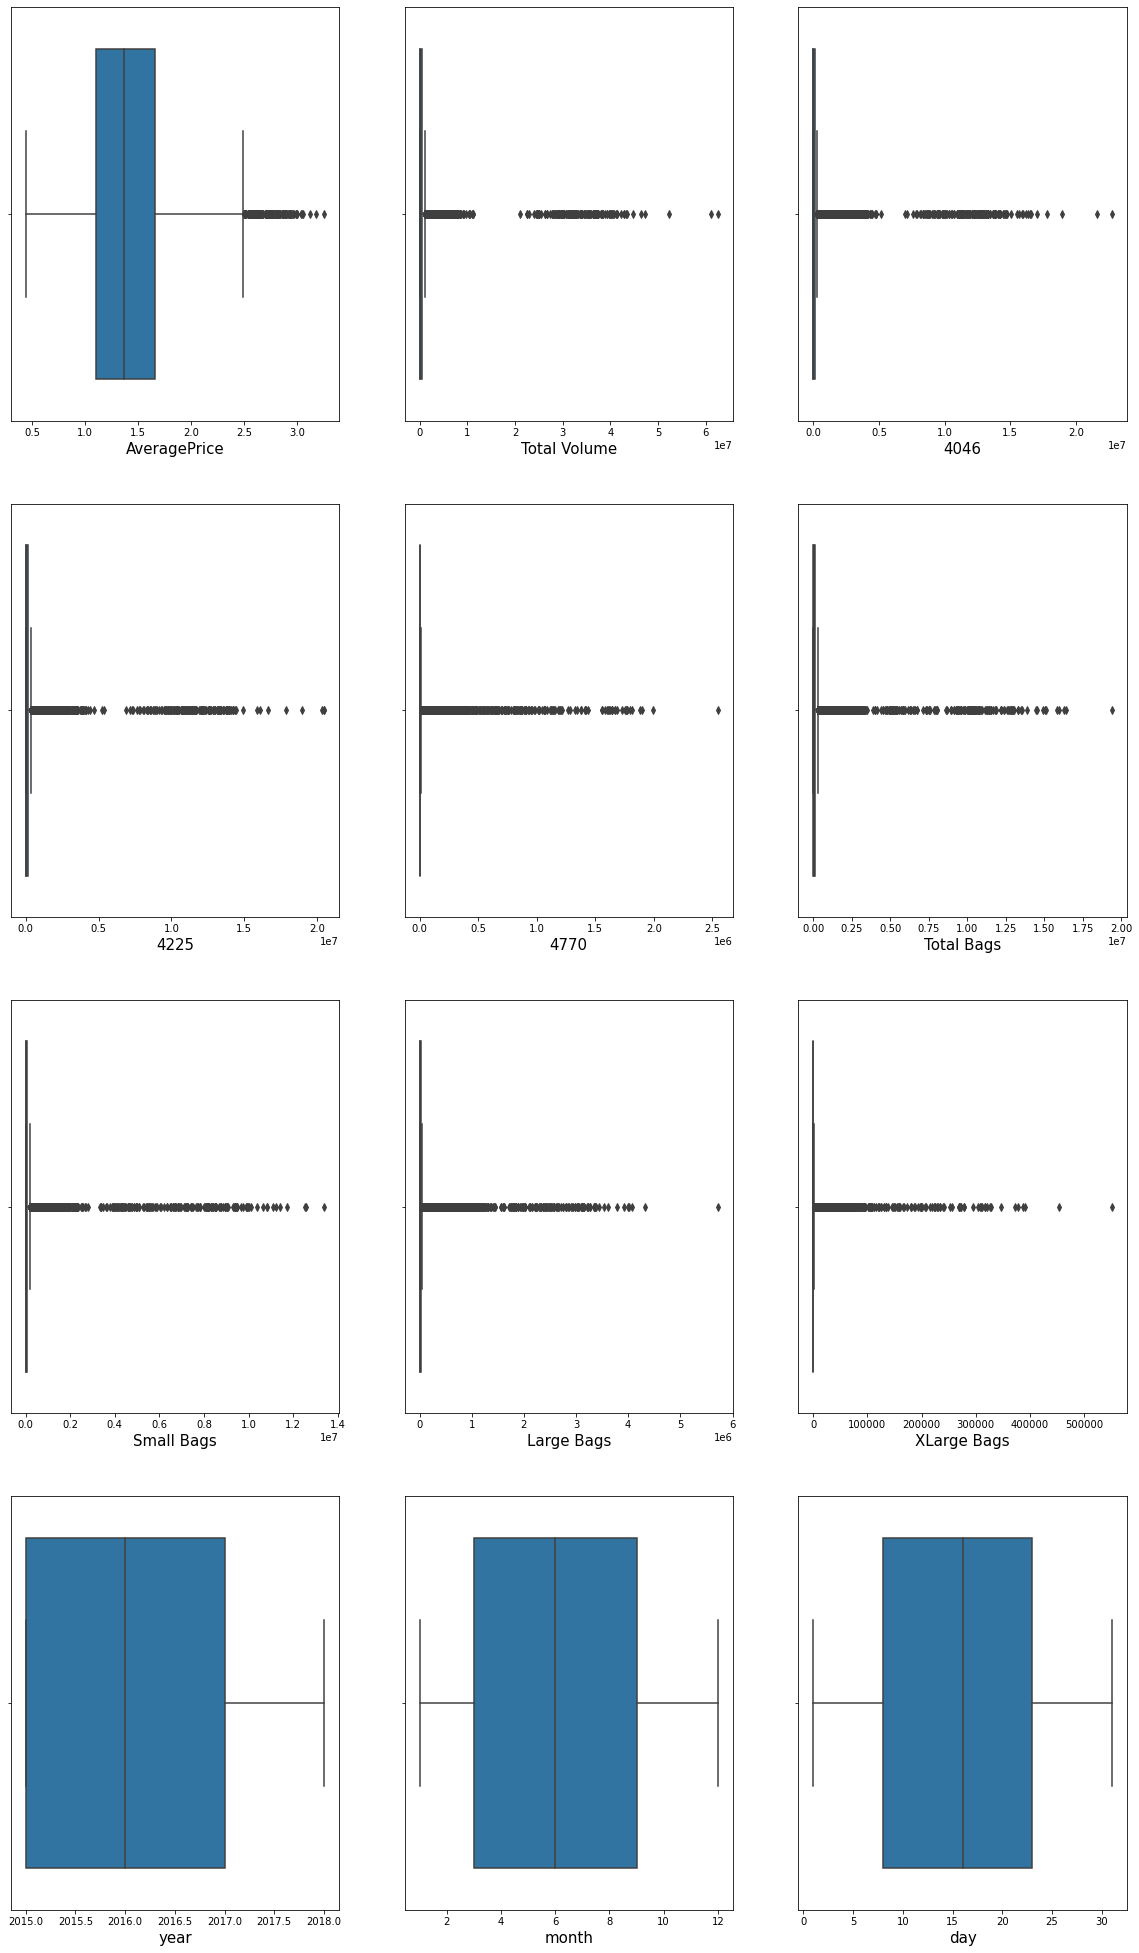

In [13]:
plt.figure (figsize=(20,35))
plotnumber = 1

for column in numeric_datatypes:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)          
    plotnumber+=1
        
plt.show()

As observed priviously AveragePrice,Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags columns have outliet, let's handle it.

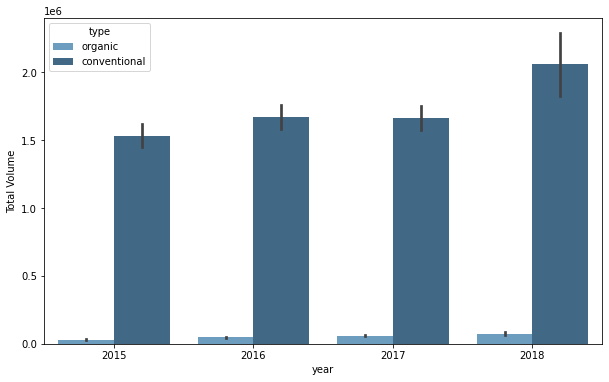

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette="Blues_d",ci=68)
plt.show()

Conventional types were sold higher every year with low price than Organic types which means the demand for conventional is high. Also The Total sales volume is spotted highest in the year 2018

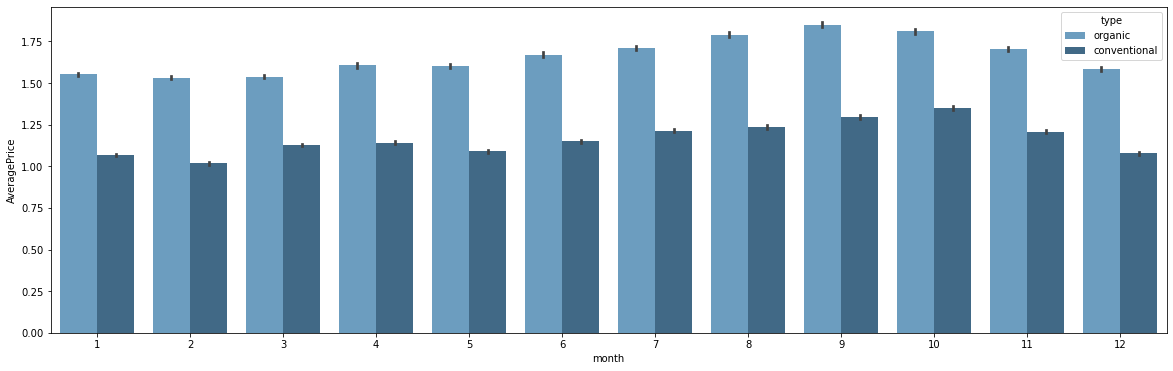

In [15]:
plt.figure(figsize=(20,6))
sns.barplot(x='month',y='AveragePrice',hue="type",data=df,palette="Blues_d",ci=68)
plt.show()

Here we can notice that the AveragePrice of organic avocado fruit is more than the conventional type. As we can observe the AveragePrice of both type of avocados is high in the months August, September and October.

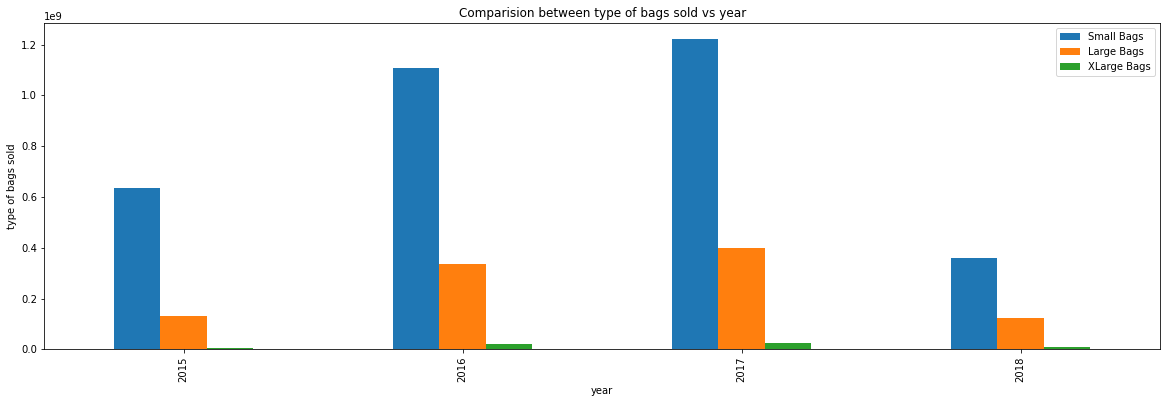

In [16]:
bags = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.year).sum()
bags.plot(kind='bar', fontsize=10,figsize=(20,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("year")
plt.ylabel("type of bags sold")
plt.show()

Small bag size was sold all time highest where Xlarge Bag size was least sold.

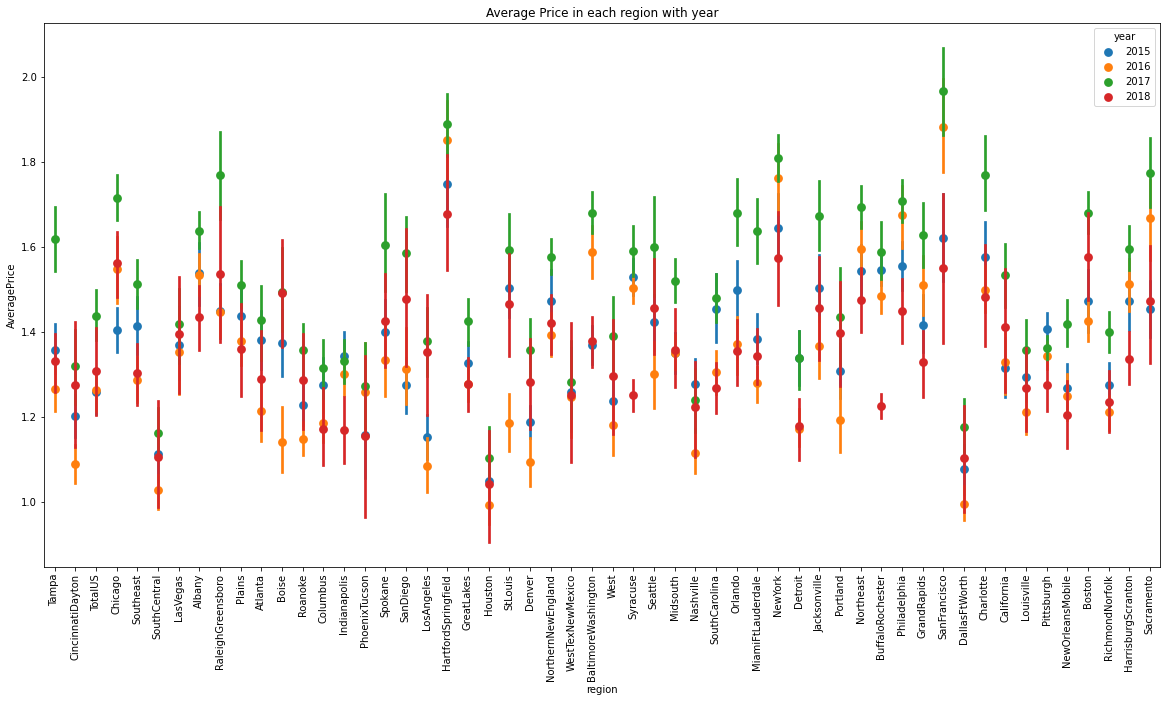

In [17]:
plt.figure(figsize=(20,10))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=df, hue='year',join=False)
plt.xticks(rotation=90)
plt.show()

The average price of the avocado is high in the region SanFrancisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high in the year 2017 and less in the year 2018.

# Since the dataset has two string values. We will use the encoding techniques to convert the sring data to numerical data.

In [18]:
for i in df.columns:
    if df[i].dtypes == 'object':
        val=df[i].unique()
        nval=df[i].nunique()
        print(i , val , nval , "\n")

type ['organic' 'conventional'] 2 

region ['Tampa' 'CincinnatiDayton' 'TotalUS' 'Chicago' 'Southeast' 'SouthCentral'
 'LasVegas' 'Albany' 'RaleighGreensboro' 'Plains' 'Atlanta' 'Boise'
 'Roanoke' 'Columbus' 'Indianapolis' 'PhoenixTucson' 'Spokane' 'SanDiego'
 'LosAngeles' 'HartfordSpringfield' 'GreatLakes' 'Houston' 'StLouis'
 'Denver' 'NorthernNewEngland' 'WestTexNewMexico' 'BaltimoreWashington'
 'West' 'Syracuse' 'Seattle' 'Midsouth' 'Nashville' 'SouthCarolina'
 'Orlando' 'MiamiFtLauderdale' 'NewYork' 'Detroit' 'Jacksonville'
 'Portland' 'Northeast' 'BuffaloRochester' 'Philadelphia' 'GrandRapids'
 'SanFrancisco' 'DallasFtWorth' 'Charlotte' 'California' 'Louisville'
 'Pittsburgh' 'NewOrleansMobile' 'Boston' 'RichmondNorfolk'
 'HarrisburgScranton' 'Sacramento'] 54 



In [19]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))
        
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
17418,2.09,6199.50,488.90,2780.41,0.00,2930.19,2923.52,6.67,0.0,1.0,2017,50.0,6,25
6099,1.01,247158.00,4314.00,89762.00,793.00,152289.00,19201.00,132886.00,203.0,0.0,2017,9.0,11,19
17479,1.68,1248175.29,199039.61,421709.78,5187.46,622238.44,400529.93,221708.51,0.0,1.0,2017,51.0,4,30
12363,2.06,21876.53,98.10,19190.24,0.00,2588.19,2588.19,0.00,0.0,1.0,2016,8.0,9,18
14333,1.75,44666.00,5090.29,15508.61,572.47,23494.63,5220.39,18274.24,0.0,1.0,2016,46.0,10,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,1.62,71076.94,2483.36,55509.31,33.88,13050.39,9877.42,3172.97,0.0,0.0,2017,0.0,11,5
14733,1.48,14413.74,1308.04,4865.24,4.77,8235.69,7090.72,1144.97,0.0,1.0,2016,53.0,2,21
15427,0.73,50686.37,18780.82,3010.21,270.75,28624.59,15918.63,12705.96,0.0,1.0,2017,12.0,1,15
15583,1.14,149650.50,4548.46,70014.08,0.00,75087.96,20170.52,54917.44,0.0,1.0,2017,15.0,2,5


# correlation of one variable vs all other variables, or multicorelation

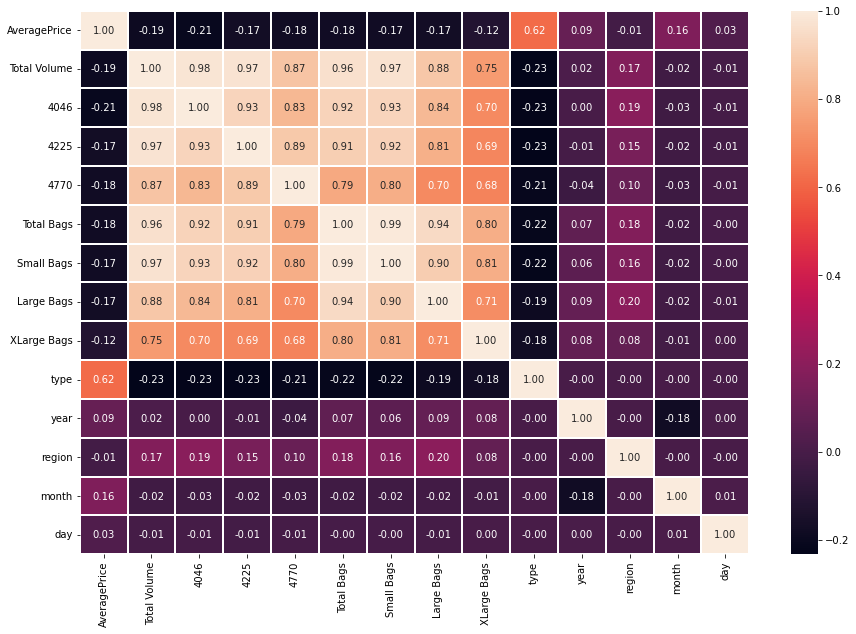

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, linewidths=0.1,fmt="0.2f")
plt.show()

In [21]:
df.drop(columns='day',inplace=True) # as no need in dataset

# [1] Regression Problem (Target = AveragePrice)

## Now Check correlation of the columns with the target column

In [22]:
df.corr()['AveragePrice'].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
region         -0.011716
year            0.093197
month           0.162409
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

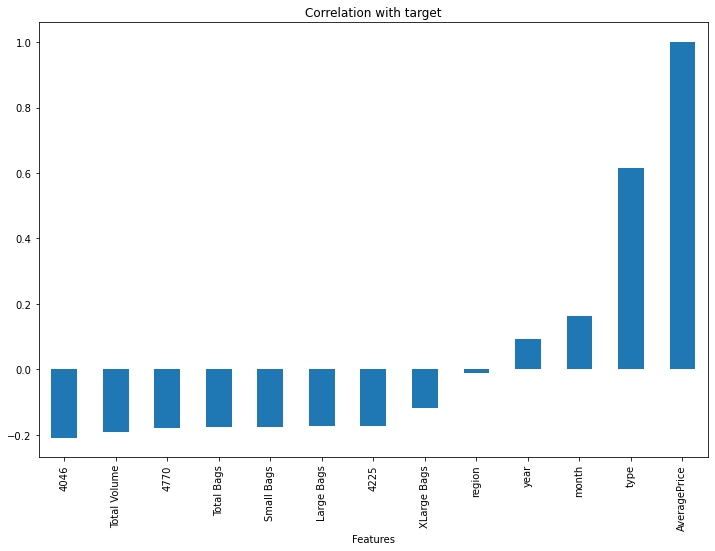

In [23]:
plt.figure(figsize=(12,8))
df.corr()['AveragePrice'].sort_values().plot(kind='bar')
plt.xlabel('Features')
plt.title('Correlation with target')
plt.show()

Here type feature has high coorelation with AveragePrice.
1. here 0 = no any correlation
2. -0.3 to 0.3 = less correlation
3. -0.5 to 0.5 = moderate correlation
4. -0.7 to 0.7 = high correlation
5. any<-0.7 = very high -ve correlation
6. any>=0.7 = very high +ve correlation

## Now Separting columns into features and target

In [24]:
x=df.drop(columns='AveragePrice')
y=df.AveragePrice
x.skew().sort_values()

region           0.000030
type             0.000329
month            0.106617
year             0.215339
4046             8.648220
4225             8.942466
Total Volume     9.007687
Small Bags       9.540660
Total Bags       9.756072
Large Bags       9.796455
4770            10.159396
XLarge Bags     13.139751
dtype: float64

## Now use PowerTransformation method to save our skewed data.

In [25]:
from sklearn.preprocessing import PowerTransformer

df_pt = PowerTransformer()
df_pw = pd.DataFrame(df_pt.fit_transform(x),columns=x.columns)
df_pw.skew().sort_values()


region         -0.261443
month          -0.146584
Large Bags     -0.073809
4046           -0.022679
4225           -0.017740
Total Bags     -0.001626
year            0.000000
type            0.000329
Small Bags      0.007058
Total Volume    0.011171
4770            0.032184
XLarge Bags     0.793520
dtype: float64

Using power transformation, most of skewness has removed

Keeping +/-0.65 o +/-0.7 as the range of skwness, also don't consider categorical column for skewness.

## Now remove remaining outliers using z-score technique.

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(df_pw))
threshold=3
np.where(z>3)

(array([  536,   661,   732,   732,  1235,  1235,  1235,  1496,  1832,
         1832,  2176,  2189,  2413,  2425,  3024,  3024,  3459,  3475,
         3653,  3753,  3905,  4264,  4346,  4346,  4369,  4426,  4426,
         4597,  4679,  4679,  4912,  5312,  5312,  5636,  5927,  6030,
         6127,  6209,  6252,  6252,  6726,  6737,  6941,  6974,  7043,
         7127,  7207,  7214,  7214,  7560,  7986,  7986,  8108,  8108,
         8185,  8417,  8436,  8559,  8810,  9264,  9348,  9381,  9580,
         9668,  9668,  9758, 10346, 10346, 10467, 10496, 10583, 10717,
        10795, 10795, 11029, 11029, 11154, 11267, 11298, 11733, 12140,
        12140, 12203, 12696, 12748, 12748, 12790, 12965, 13642, 13717,
        13735, 13770, 13849, 15129, 15576, 15576, 15687, 15778, 15783,
        15942, 16016, 16072, 16181, 16674, 16855, 17176, 17232, 17545,
        17586, 17630, 17630, 17634, 17756, 17765, 17765, 17765, 17765,
        17892, 17892, 17991, 18094, 18131, 18157], dtype=int64),
 array([4, 5

In [27]:
df_new= df[(z<3).all(axis=1)]

print('percentage of loss of data by zscore is :',((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

percentage of loss of data by zscore is : 0.5370157268891446


Very less data, we have loss using z-tarnsformation method, let's proceed further.

In [28]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
17418,2.09,6199.50,488.90,2780.41,0.00,2930.19,2923.52,6.67,0.0,1.0,2017,50.0,6
6099,1.01,247158.00,4314.00,89762.00,793.00,152289.00,19201.00,132886.00,203.0,0.0,2017,9.0,11
17479,1.68,1248175.29,199039.61,421709.78,5187.46,622238.44,400529.93,221708.51,0.0,1.0,2017,51.0,4
12363,2.06,21876.53,98.10,19190.24,0.00,2588.19,2588.19,0.00,0.0,1.0,2016,8.0,9
14333,1.75,44666.00,5090.29,15508.61,572.47,23494.63,5220.39,18274.24,0.0,1.0,2016,46.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,1.62,71076.94,2483.36,55509.31,33.88,13050.39,9877.42,3172.97,0.0,0.0,2017,0.0,11
14733,1.48,14413.74,1308.04,4865.24,4.77,8235.69,7090.72,1144.97,0.0,1.0,2016,53.0,2
15427,0.73,50686.37,18780.82,3010.21,270.75,28624.59,15918.63,12705.96,0.0,1.0,2017,12.0,1
15583,1.14,149650.50,4548.46,70014.08,0.00,75087.96,20170.52,54917.44,0.0,1.0,2017,15.0,2


Now dataset is readly for further process, no nulls, all data in numeric form, with 18151 rows and 12 columns

In [29]:
x_new=df_new.drop(columns='AveragePrice')
y_new=df_new.AveragePrice

## Data Scaling using Standard Scaler

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_new),columns=x_new.columns)
x_scaled

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,-0.244418,-0.231271,-0.242671,-0.212641,-0.239858,-0.240161,-0.222435,-0.175752,1.000496,0.907844,1.507508,-0.050189
1,-0.174808,-0.228255,-0.170591,-0.205280,-0.088748,-0.218394,0.321231,-0.164304,-0.999504,0.907844,-1.122511,1.365260
2,0.114376,-0.074675,0.104487,-0.164486,0.386709,0.291529,0.684642,-0.175752,1.000496,0.907844,1.571655,-0.616369
3,-0.239890,-0.231580,-0.229072,-0.212641,-0.240204,-0.240609,-0.222462,-0.175752,1.000496,-0.156507,-1.186657,0.799080
4,-0.233306,-0.227642,-0.232123,-0.207327,-0.219052,-0.237089,-0.147694,-0.175752,1.000496,-0.156507,1.250921,1.082170
...,...,...,...,...,...,...,...,...,...,...,...,...
18146,-0.225676,-0.229698,-0.198976,-0.212327,-0.229619,-0.230862,-0.209480,-0.175752,-0.999504,0.907844,-1.699832,1.365260
18147,-0.242045,-0.230625,-0.240943,-0.212597,-0.234490,-0.234588,-0.217778,-0.175752,1.000496,-0.156507,1.699948,-1.182549
18148,-0.231567,-0.216845,-0.242480,-0.210128,-0.213862,-0.222783,-0.170477,-0.175752,1.000496,0.907844,-0.930070,-1.465639
18149,-0.202977,-0.228070,-0.186956,-0.212641,-0.166854,-0.217098,0.002228,-0.175752,1.000496,0.907844,-0.737630,-1.182549


## Checking VIF values to solve multicollinearity

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled.values, i) for i in range (x_scaled.shape[1])]
vif['features'] = x_scaled.columns

#let's check the values
vif

,vif,features
0,4.923175e+09,Total Volume
1,6.605186e+08,4046
2,5.983259e+08,4225
3,4.768070e+06,4770
4,2.370316e+14,Total Bags
5,1.364727e+14,Small Bags
6,1.445778e+13,Large Bags
7,7.616373e+10,XLarge Bags
8,1.061680e+00,type
9,1.084192e+00,year


In [32]:
# Dropping the feature Total Volume
x_scaled.drop("Total Bags",axis=1, inplace=True)

In [33]:
# Again checke the VIF after removing one column

vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled.values, i) for i in range (x_scaled.shape[1])]
vif['features'] = x_scaled.columns

# let's check the values
vif

,vif,features
0,4.923172e+09,Total Volume
1,6.605180e+08,4046
2,5.983254e+08,4225
3,4.768066e+06,4770
4,2.297808e+08,Small Bags
5,2.454450e+07,Large Bags
6,1.291572e+05,XLarge Bags
7,1.061626e+00,type
8,1.084129e+00,year
9,1.069703e+00,region


In [34]:
# Dropping the feature Total Bags
x_scaled.drop("Total Volume",axis=1, inplace=True)

In [35]:
# Again checke the VIF after removing one column

vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled.values, i) for i in range (x_scaled.shape[1])]
vif['features'] = x_scaled.columns

# let's check the values
vif

,vif,features
0,10.146994,4046
1,13.402426,4225
2,5.391239,4770
3,19.530136,Small Bags
4,5.633406,Large Bags
5,3.420749,XLarge Bags
6,1.059790,type
7,1.081526,year
8,1.069554,region
9,1.036266,month


In [36]:
X=x_scaled
y=y_new

# Regression Model Development

In [37]:
#import the necessary model algos.
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor


#model selection
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold

#evaluation metrics
from sklearn.metrics import r2_score

In [38]:
LR = LinearRegression()
LSO= Lasso()
RIG= Ridge()
KNN= KNeighborsRegressor()
RF = RandomForestRegressor()
DT = DecisionTreeRegressor()
SV = SVR()
BAG= BaggingRegressor()
GRA= GradientBoostingRegressor()
ADA= AdaBoostRegressor()

In [40]:
model=[LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), RandomForestRegressor(), BaggingRegressor(),
       DecisionTreeRegressor(), SVR(), GradientBoostingRegressor(), AdaBoostRegressor()]

models=['LR = LinearRegression()','LSO = Lasso()', 'RIG = Ridge()', 'KNN = KNeighborsRegressor()',
        'RF = RandomForestRegressor()', 'BAG = BaggingRegressor()', 'DT = DecisionTreeRegressor()', 'SV = SVR()', 
        'GRA = GradientBoostingRegressor()', 'ADA = AdaBoostRegressor()']

acc_result=[]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=11)

for i in range(len(model)):
    clf=model[i]
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc_result.append(round (r2_score(y_pred,y_test)*100,2))

Result_df=pd.DataFrame({'Model Name':models, 'Accuracy Score (without tuning)':acc_result})
Result_df

,Model Name,Accuracy Score (without tuning)
0,LR = LinearRegression(),-23.35
1,LSO = Lasso(),0.00
2,RIG = Ridge(),-23.37
3,KNN = KNeighborsRegressor(),70.66
4,RF = RandomForestRegressor(),87.06
5,BAG = BaggingRegressor(),85.06
6,DT = DecisionTreeRegressor(),76.38
7,SV = SVR(),24.32
8,GRA = GradientBoostingRegressor(),60.85
9,ADA = AdaBoostRegressor(),35.17


# 1.1 Linear Regression:

In [41]:
r2s_train=[]
r2s_test=[]

for i in range (0,1000):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    x_lr_predict=lr.predict(x_train)
    y_lr_predict=lr.predict(x_test)
    
    r2s_train.append(r2_score(y_train,x_lr_predict))
    r2s_test.append(r2_score(y_test,y_lr_predict))

    
r2s_test_index= r2s_test.index(max(r2s_test))
print("Index of max vaule of test's R2 score at",r2s_test_index)
        
r2s_train_index= r2s_train.index(max(r2s_train))    
print("Index of max vaule of train's R2 score at",r2s_train_index)

Index of max vaule of test's R2 score at 870
Index of max vaule of train's R2 score at 331


In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=870)
    
lr.fit(x_train,y_train)
x_predict=lr.predict(x_train)
y_lr_predict=lr.predict(x_test)
    
print ("The training accurancy @ 870 state is:",r2_score(y_train,x_predict))
print ("The testing accurancy @ 870 state is:",r2_score(y_test,y_lr_predict))

The training accurancy @ 870 state is: 0.4311595245392462
The testing accurancy @ 870 state is: 0.46764944343087067


In [43]:
#Cross-Validation of the Model

kford_val=KFold(n_splits=10,shuffle=False)

Train_accuracy=r2_score(y_train,x_lr_predict)
Test_accuracy =r2_score(y_test,y_lr_predict)

from sklearn.model_selection import cross_val_score

for i in range (2,10):
    cv_score = cross_val_score(lr,X,y,cv=kford_val)
    cv_mean = cv_score.mean()
    print("At Cross fold", i, "the cv score is", cv_mean, "\n  accuracy score for training is", Train_accuracy,
          "\n& accuracy for testing is", Test_accuracy)
    print("\n")

At Cross fold 2 the cv score is 0.43810626515121787 
  accuracy score for training is -0.4355135760318758 
& accuracy for testing is 0.46764944343087067


At Cross fold 3 the cv score is 0.43810626515121787 
  accuracy score for training is -0.4355135760318758 
& accuracy for testing is 0.46764944343087067


At Cross fold 4 the cv score is 0.43810626515121787 
  accuracy score for training is -0.4355135760318758 
& accuracy for testing is 0.46764944343087067


At Cross fold 5 the cv score is 0.43810626515121787 
  accuracy score for training is -0.4355135760318758 
& accuracy for testing is 0.46764944343087067


At Cross fold 6 the cv score is 0.43810626515121787 
  accuracy score for training is -0.4355135760318758 
& accuracy for testing is 0.46764944343087067


At Cross fold 7 the cv score is 0.43810626515121787 
  accuracy score for training is -0.4355135760318758 
& accuracy for testing is 0.46764944343087067


At Cross fold 8 the cv score is 0.43810626515121787 
  accuracy score 

# 1.2 Lasso Regression:

In [48]:
lasscv = LassoCV (alphas=None, max_iter= 100)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100)

In [49]:
# best alpha parameter
alpha = lasscv.alpha_
las = Lasso(alpha)
las.fit(x_train,y_train)
las.score(x_train,y_train)

0.43113231263079077

In [50]:
y_las_predict=las.predict(x_test)
r2_score(y_test,y_las_predict)

0.46765255239258685

In [51]:
cv_score=cross_val_score(las,X,y,cv=kford_val)
cv_score.mean()

0.43808950196021285

# 1.3 Ridge Regression:

In [52]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)
alpha = ridgecv.alpha_

rig = Ridge (alpha)
rig.fit(x_train,y_train)
rig.score(x_train,y_train)

0.4311595243915962

In [53]:
y_rig_predict=rig.predict(x_test)
r2_score(y_test,y_rig_predict)

0.46764931497065854

In [54]:
cv_score=cross_val_score(rig,X,y,cv=kford_val)
cv_score.mean()

0.4381062957034471

# 1.4 KNeighbors Regressor:

In [55]:
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)

y_knn_predict=knn.predict(x_test)
print('R2 Score:',r2_score(y_test,y_knn_predict))

cv_score=cross_val_score(knn,x_scaled,y,cv=kford_val)
print ('Cross validation:',cv_score.mean())

R2 Score: 0.6804169458228038
Cross validation: 0.6869893114412943


# 1.5 RandomForest Regression:

In [56]:
rf=RandomForestRegressor(criterion='mse')

rf.fit(x_train,y_train)

y_rf_predict=rf.predict(x_test)
print('R2 Score:',r2_score(y_test,y_rf_predict))

cv_score=cross_val_score(rf,x_scaled,y,cv=kford_val)
print ('Cross validation:',cv_score.mean())

R2 Score: 0.9005985819850308
Cross validation: 0.8971889906633919


# 1.6 Bagging Regression:

In [57]:
bag=BaggingRegressor(base_estimator=RandomForestRegressor(),random_state=69)

bag.fit(x_train,y_train)

y_bag_predict=bag.predict(x_test)
print('R2 Score:',r2_score(y_test,y_bag_predict))

cv_score=cross_val_score(rf,x_scaled,y,cv=kford_val)
print ('Cross validation:',cv_score.mean())

R2 Score: 0.8883812969686363
Cross validation: 0.8970588431917677


In [58]:
Acc_Score_tun =[round (r2_score(y_test,y_lr_predict)*100,2),
                round (r2_score(y_test,y_las_predict)*100,2),
                round (r2_score(y_test,y_rig_predict)*100,2),
                round (r2_score(y_test,y_knn_predict)*100,2),
                round (r2_score(y_test,y_rf_predict)*100,2),
                round (r2_score(y_test,y_bag_predict)*100,2)]

Avocado_AveragePrice = pd.DataFrame({'Regressor':['lr = LinearRegression()', 'las = Lasso()','rig = Ridge()',
                                'knn = KNeighborsRegressor()' ,'rf = RandomForestRegressor()', 'bag = BaggingRegressor()'],
                                 
                                'Accuracy Score (with tuning)':Acc_Score_tun})
Avocado_AveragePrice

,Regressor,Accuracy Score (with tuning)
0,lr = LinearRegression(),46.76
1,las = Lasso(),46.77
2,rig = Ridge(),46.76
3,knn = KNeighborsRegressor(),68.04
4,rf = RandomForestRegressor(),90.06
5,bag = BaggingRegressor(),88.84


In [59]:
AVOCADO_AVG_PRICE= pd.concat([Result_df[0:6],Avocado_AveragePrice],axis=1)
AVOCADO_AVG_PRICE

,Model Name,Accuracy Score (without tuning),Regressor,Accuracy Score (with tuning)
0,LR = LinearRegression(),-23.35,lr = LinearRegression(),46.76
1,LSO = Lasso(),0.00,las = Lasso(),46.77
2,RIG = Ridge(),-23.37,rig = Ridge(),46.76
3,KNN = KNeighborsRegressor(),70.66,knn = KNeighborsRegressor(),68.04
4,RF = RandomForestRegressor(),87.06,rf = RandomForestRegressor(),90.06
5,BAG = BaggingRegressor(),85.06,bag = BaggingRegressor(),88.84


# We are gettig high model accuracy: 90.06% in RandomForestRegressor model with very good cross_val_score: 89.7%,
# The RandomForestRegressor shows model is performing exremely well, so we can save this model.
# Save the model using pickle

In [60]:
import pickle
pickle.dump(rf,open('Avocado-RegressionModel_AveragePrice','wb'))

# [2] Classification Problem (Target = region)

## Now Check correlation of the columns with the target column

In [61]:
df.corr()['region'].sort_values()

AveragePrice   -0.011716
type           -0.000280
month          -0.000144
year           -0.000055
XLarge Bags     0.082281
4770            0.095252
4225            0.145726
Small Bags      0.164702
Total Volume    0.174176
Total Bags      0.175256
4046            0.192073
Large Bags      0.198768
region          1.000000
Name: region, dtype: float64

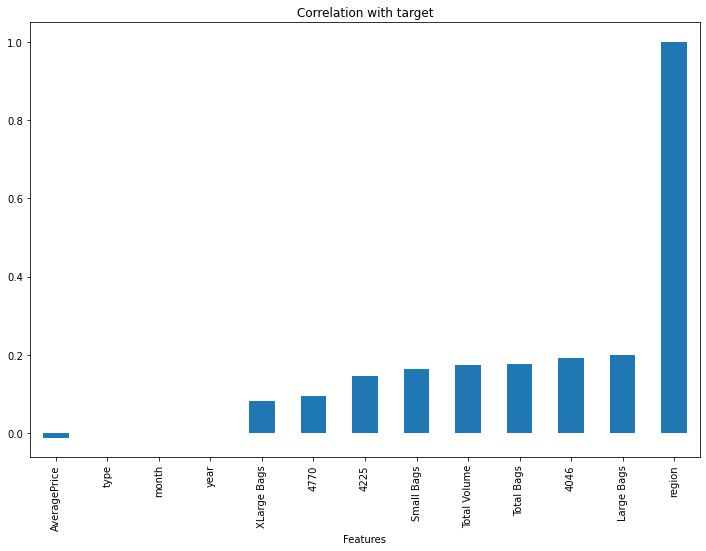

In [62]:
plt.figure(figsize=(12,8))
df.corr()['region'].sort_values().plot(kind='bar')
plt.xlabel('Features')
plt.title('Correlation with target')
plt.show()

Thers is no any correlation of type, month and year features with target.

## Now Separting columns into features and target

In [63]:
xc=df.drop(columns='region')
yc=df.region
xc.skew().sort_values()

type             0.000329
month            0.106617
year             0.215339
AveragePrice     0.580303
4046             8.648220
4225             8.942466
Total Volume     9.007687
Small Bags       9.540660
Total Bags       9.756072
Large Bags       9.796455
4770            10.159396
XLarge Bags     13.139751
dtype: float64

## Now use PowerTransformation method to save our skewed data.

In [64]:
df_pt = PowerTransformer()
df_pwc = pd.DataFrame(df_pt.fit_transform(xc),columns=xc.columns)
df_pwc.skew().sort_values()

month          -0.146584
Large Bags     -0.073809
4046           -0.022679
4225           -0.017740
Total Bags     -0.001626
year            0.000000
type            0.000329
AveragePrice    0.005596
Small Bags      0.007058
Total Volume    0.011171
4770            0.032184
XLarge Bags     0.793520
dtype: float64

## Now remove remaining outliers using z-transformation technique.

In [65]:
from scipy.stats import zscore
zc=np.abs(zscore(df_pwc))
threshold=3
np.where(zc>3)

(array([  536,   661,   732,   732,  1235,  1235,  1235,  1496,  1832,
         1832,  2176,  2189,  2413,  2425,  3024,  3024,  3459,  3475,
         3653,  3753,  3905,  4264,  4346,  4346,  4369,  4426,  4426,
         4597,  4679,  4679,  4912,  5312,  5312,  5636,  5927,  6030,
         6127,  6209,  6252,  6252,  6726,  6737,  6941,  6974,  7043,
         7127,  7207,  7214,  7214,  7560,  7797,  7986,  7986,  8108,
         8108,  8185,  8359,  8417,  8436,  8547,  8559,  8810,  9264,
         9282,  9348,  9381,  9580,  9612,  9668,  9668,  9758,  9769,
         9867, 10346, 10346, 10467, 10496, 10583, 10717, 10795, 10795,
        11029, 11029, 11154, 11267, 11298, 11733, 12140, 12140, 12203,
        12696, 12748, 12748, 12790, 12965, 13583, 13642, 13717, 13735,
        13770, 13849, 15129, 15576, 15576, 15687, 15778, 15783, 15800,
        15942, 16016, 16072, 16181, 16674, 16855, 17008, 17176, 17232,
        17545, 17586, 17630, 17630, 17634, 17756, 17765, 17765, 17765,
      

In [66]:
df_new_c= df[(zc<3).all(axis=1)]

print('percentage of loss of data by zscore is :',((df.shape[0]-df_new_c.shape[0])/df.shape[0])*100)

percentage of loss of data by zscore is : 0.5918132500410981


In [67]:
xc_new=df_new_c.drop(columns='region')
yc_new=df_new_c.region

## Data Scaling using Standard Scaler

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xc_scaled = pd.DataFrame(scaler.fit_transform(xc_new),columns=xc_new.columns)
xc_scaled

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month
0,1.697421,-0.244526,-0.231339,-0.242689,-0.212555,-0.240049,-0.240417,-0.222395,-0.175769,1.000717,0.907954,-0.050220
1,-0.982982,-0.174772,-0.228317,-0.170508,-0.205190,-0.088525,-0.218582,0.321932,-0.164285,-0.999284,0.907954,1.365310
2,0.679861,0.115007,-0.074431,0.104955,-0.164373,0.388236,0.292953,0.685784,-0.175769,1.000717,0.907954,-0.616431
3,1.622965,-0.239987,-0.231648,-0.229071,-0.212555,-0.240396,-0.240867,-0.222422,-0.175769,1.000717,-0.156489,0.799098
4,0.853590,-0.233390,-0.227703,-0.232127,-0.207238,-0.219186,-0.237336,-0.147564,-0.175769,1.000717,-0.156489,1.082204
...,...,...,...,...,...,...,...,...,...,...,...,...
18136,0.530949,-0.225745,-0.229763,-0.198933,-0.212241,-0.229782,-0.231089,-0.209424,-0.175769,-0.999284,0.907954,1.365310
18137,0.183490,-0.242148,-0.230692,-0.240959,-0.212511,-0.234667,-0.234827,-0.217732,-0.175769,1.000717,-0.156489,-1.182643
18138,-1.677901,-0.231647,-0.216884,-0.242498,-0.210041,-0.213982,-0.222985,-0.170373,-0.175769,1.000717,0.907954,-1.465749
18139,-0.660341,-0.202999,-0.228131,-0.186896,-0.212555,-0.166845,-0.217281,0.002541,-0.175769,1.000717,0.907954,-1.182643


In [69]:
XC=xc_scaled
yc=yc_new

# Classification Model Development

In [70]:
#import the necessary model algos.

#classifiaction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [71]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
KNN= KNeighborsClassifier()
RF = RandomForestClassifier()
SV = SVC()
GRA= GradientBoostingClassifier()
ADA= AdaBoostClassifier()
GNB= GaussianNB()

In [72]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(), SVC(),
       GradientBoostingClassifier(),AdaBoostClassifier(),GaussianNB()]

models=['LR=LogisticRegression','DT=DecisionTreeClassifier','KNN=KNeighborsClassifier','RF=RandomForestClassifier',
        'SV=SVC()','GRA=GradientBoostingClassifier','ADA=AdaBoostClassifier','GNB=GaussianNB']

acc_result=[]

x_train,x_test,y_train,y_test=train_test_split(XC,yc,test_size=0.20,random_state=5)

for i in range(len(model)):
    clf=model[i]
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc_result.append(round (accuracy_score(y_pred,y_test)*100,2))

Result_df=pd.DataFrame({'Model Name':models, 'Accuracy Score (without tuning)':acc_result})
Result_df

,Model Name,Accuracy Score (without tuning)
0,LR=LogisticRegression,34.47
1,DT=DecisionTreeClassifier,80.57
2,KNN=KNeighborsClassifier,33.70
3,RF=RandomForestClassifier,92.04
4,SV=SVC(),25.27
5,GRA=GradientBoostingClassifier,84.13
6,ADA=AdaBoostClassifier,7.16
7,GNB=GaussianNB,31.66


# 1.1 Logistic Regression:

In [73]:
acc_train=[]
acc_test=[]

for i in range (0,10):
    x_train, x_test, y_train, y_test = train_test_split(XC, yc, test_size=0.20, random_state=i)
    
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    
    x_lr_predict=lr.predict(x_train)
    y_lr_predict=lr.predict(x_test)
    
    acc_train.append(accuracy_score(y_train,x_lr_predict))
    acc_test.append(accuracy_score(y_test,y_lr_predict))
    

acc_train_index= acc_train.index(max(acc_train))    
print("Index of max vaule of train's accuracy_score at random_state:",acc_train_index)

acc_test_index= acc_test.index(max(acc_test))
print("Index of max vaule of test's accuracy_score at random_state:",acc_test_index)

Index of max vaule of train's accuracy_score at random_state: 8
Index of max vaule of test's accuracy_score at random_state: 5


In [74]:
x_train, x_test, y_train, y_test = train_test_split(XC, yc, test_size=0.20, random_state=5)
    
lr.fit(x_train,y_train)
x_lr_predict=lr.predict(x_train)
y_lr_predict=lr.predict(x_test)
    
print ("The training accurancy @ 5 random_state is:",accuracy_score(y_train,x_lr_predict))
print ("The testing accurancy @ 5 ranom_state is:",accuracy_score(y_test,y_lr_predict))

The training accurancy @ 5 random_state is: 0.3474366041896362
The testing accurancy @ 5 ranom_state is: 0.34472306420501514


# 2.2 Decision Tree:

In [75]:
grid_param = {
            'criterion':['gini','entropy'],
            'max_depth': range(10,12), # the max depth of the tree.
            'min_samples_leaf': range (2,4), # the max no of samples required to be at a leaf node.
            'min_samples_split': range (3,5), # the max no of samples required to split on interval node.
            'max_leaf_nodes': range (5,7) # Best nodes are defined as a realtive in impurity. If none then nunlimited no of leaf nodes.
}
grid_search = GridSearchCV (DT, param_grid = grid_param, cv=10, n_jobs = -1)
# n_jobs : Use all the cores in your system. For performance improvement.
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 12),
                         'max_leaf_nodes': range(5, 7),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(3, 5)})

In [76]:
#Initiate DecisitionTreeClassifier with new parametes and train
dt=grid_search.best_estimator_

# Train the model
dt.fit(x_train,y_train)

x_dt_predict=dt.predict(x_train)
y_dt_predict=dt.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_dt_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_dt_predict))

The training accurancy is: 0.06422271223814774
The testing accurancy is: 0.05786718104160926


# 2.3 K-Nearest Neighbour:

In [77]:
neighbors = [i for i in range(1,10)]
parameter_grid = { 'algorithm' : ['kd_tree', 'brute'],
                   'leaf_size' : [3,5,6,7,8],
                   'n_neighbors': neighbors}
gridsearch = GridSearchCV(KNN, param_grid=parameter_grid)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [78]:
#Initiate KNN with new parametes and train
knn=gridsearch.best_estimator_

# Train the model
knn.fit(x_train,y_train)

x_knn_predict=knn.predict(x_train)
y_knn_predict=knn.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_knn_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_knn_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_knn_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_knn_predict))

The training accurancy is: 1.0
The testing accurancy is: 0.4552218241939928

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.21      0.29      0.24        51
         1.0       0.46      0.37      0.41        73
         2.0       0.54      0.42      0.47        66
         3.0       0.39      0.45      0.42        71
         4.0       0.59      0.48      0.53        84
         5.0       0.35      0.38      0.36        65
         6.0       0.87      0.71      0.78        65
         7.0       0.42      0.37      0.39        67
         8.0       0.66      0.70      0.68        57
         9.0       0.42      0.39      0.40        62
        10.0       0.15      0.23      0.18        61
        11.0       0.58      0.51      0.54        87
        12.0       0.76      0.58      0.66        76
        13.0       0.53      0.41      0.46        73
        14.0       0.30      0.32      0.31        68
        15.0       0.83  

# 2.4 Random forest:

In [82]:
params = {  'n_estimators' : [10,15,35],
            'criterion':['gini','entropy'],
            'max_depth': [10,15,40], # the max depth of the tree.
            'min_samples_leaf': [5,6], # the max no of samples required to be at a leaf node.
            'min_samples_split': [10,11] # the max no of samples required to split on interval node.
            #'max_leaf_nodes': range (5,10) # Best nodes are defined as a realtive in impurity. If none then nunlimited no of leaf nodes.
}

gridsearch_rf = GridSearchCV(RF, param_grid=params,cv=10, n_jobs = -1)
gridsearch_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 40], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [10, 15, 35]})

In [83]:
#Initiate RandomForestClassifier with new parametes and train
rf=gridsearch_rf.best_estimator_

# Train the model
rf.fit(x_train,y_train)

x_rf_predict=rf.predict(x_train)
y_rf_predict=rf.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_rf_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_rf_predict))

The training accurancy is: 0.9666482910694597
The testing accurancy is: 0.8922568200606228


# 2.5 SVC

In [84]:
#Initiate RandomForestClassifier with new parametes and train
sv=SVC(gamma='auto')

# Train the model
sv.fit(x_train,y_train)

x_sv_predict=sv.predict(x_train)
y_sv_predict=sv.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_sv_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_sv_predict))

The training accurancy is: 0.269845644983462
The testing accurancy is: 0.2513089005235602


In [85]:
Acc_Score_tun =[round (accuracy_score(y_test,y_lr_predict)*100,2),
                round (accuracy_score(y_test,y_dt_predict)*100,2),
                round (accuracy_score(y_test,y_knn_predict)*100,2),
                round (accuracy_score(y_test,y_rf_predict)*100,2),
                round (accuracy_score(y_test,y_sv_predict)*100,2)]
Avocado_region = pd.DataFrame({'Classifier':['lr = LogisticRegression()', 'dt = DecisionTreeClassifier()',
                                               'knn = KNeighborsClassifier()','rf = RandomForestClassifier()','sv=SVC()'], 
                                 
                                'Accuracy Score (with tuning)':Acc_Score_tun})
Avocado_region

,Classifier,Accuracy Score (with tuning)
0,lr = LogisticRegression(),34.47
1,dt = DecisionTreeClassifier(),5.79
2,knn = KNeighborsClassifier(),45.52
3,rf = RandomForestClassifier(),89.23
4,sv=SVC(),25.13


In [86]:
AVOCADO_REGION= pd.concat([Result_df[0:5],Avocado_region],axis=1)
AVOCADO_REGION

,Model Name,Accuracy Score (without tuning),Classifier,Accuracy Score (with tuning)
0,LR=LogisticRegression,34.47,lr = LogisticRegression(),34.47
1,DT=DecisionTreeClassifier,80.57,dt = DecisionTreeClassifier(),5.79
2,KNN=KNeighborsClassifier,33.70,knn = KNeighborsClassifier(),45.52
3,RF=RandomForestClassifier,92.04,rf = RandomForestClassifier(),89.23
4,SV=SVC(),25.27,sv=SVC(),25.13


# We are gettig high model accuracy: 92.04 with RandomForestClassifier model, but without tuning method, which shows model is performing exremely well, so we can save this model.
# Save the model using pickle

In [87]:
import pickle
pickle.dump(RF,open('Avocado-ClassificationModel_Region','wb'))

# From this project we have develop two models.
# 1. RandomForestRegressor Model with accuracy 90.06% with tuning to predict Average Price.
# 2. RandomForestClassifier Model with accuracy 92.04% without tunning to predict region.